## Programming and Maths for AI: Task 1

Let's load our dataset

In [4]:
import pandas as pd
df = pd.read_csv('winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


First, let's count the null values and drop all rows that have null values

In [5]:
df.isna().sum()


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df.dropna(inplace=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Now, we want to check whether the dataset is balanced or not

In [7]:
df['quality'].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

We notice that this dataset is highly imbalanced and this will result to issues in results. To resolve this issue, we will work only with the 3 highest classes (5,6,7) and we will take 1,000 samples of each to have a balanced dataset

In [8]:
samples = []

for quality in [5, 6, 7]:
    class_rows = df[df['quality'] == quality]
    
    # Sample with replacement if not enough samples
    sampled_rows = class_rows.sample(
        n=2000,
        replace=len(class_rows) < 2000,
        random_state=42
    )
    
    samples.append(sampled_rows)

sampled_df = pd.concat(samples).reset_index(drop=True)

sampled_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.3,0.270,0.23,2.90,0.047,13.0,100.0,0.99360,3.28,0.43,9.8,5
1,red,7.5,0.610,0.26,1.90,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5
2,red,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
3,white,6.7,0.240,0.41,2.90,0.039,48.0,122.0,0.99052,3.25,0.43,12.0,5
4,red,7.2,0.580,0.03,2.30,0.077,7.0,28.0,0.99568,3.35,0.52,10.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,white,7.1,0.180,0.49,1.30,0.033,12.0,72.0,0.99072,3.05,0.53,11.3,7
5996,white,7.3,0.260,0.33,17.85,0.049,41.5,195.0,1.00000,3.06,0.44,9.1,7
5997,white,6.4,0.230,0.35,4.60,0.039,43.0,147.0,0.99216,3.18,0.40,11.0,7
5998,red,8.5,0.280,0.35,1.70,0.061,6.0,15.0,0.99524,3.30,0.74,11.8,7


Now we need to convert text data to numerical ones. To do so, we will convert white to 0 and red to 1 values

In [9]:
# Map 'type' to numbers
sampled_df['type'] = sampled_df['type'].map({'white': 0, 'red': 1})
sampled_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,6.3,0.270,0.23,2.9,0.047,13.0,100.0,0.99360,3.28,0.43,9.8,5
1,1,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5
2,1,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
3,0,6.7,0.240,0.41,2.9,0.039,48.0,122.0,0.99052,3.25,0.43,12.0,5
4,1,7.2,0.580,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.0,5


In [10]:
# Features
X = sampled_df.drop('quality', axis=1)

# Target
y = sampled_df['quality']

As we have lots of features with different scales each, that can affect performance, we will apply Standardization to our data, in order to get a common scale ranging from 0 to 1.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.to_numpy()             # Convert target to NumPy array


### Train test splitting

Stratify- Ensures that the proportion of a target variable's classes is the same in training, testing and testing sets as it was in the original
The dataset has been split into the following manner:
1. Firstly the dataset is split into train and test which 80% for training and 20% for testing maintaining the distribution of the class in each folder using Stratify.
2. Secondly the test data is further split into 10% tetsing and 10% validation dataset again maintaing the distribution of the classes in the dataset .
Overall, the entire dataset is split in the ratio 80:10:10 (80% training, 10% testing and 10% validation)

In [32]:
#splitting the dataset into train and testing which is 80% training and 20% testing
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, shuffle=True, stratify=y
)

# Now splitting the dataset into test and validation where 20% breaks down to 10% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp
)

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")

Training data: (4800, 12), Validation data: (600, 12), Test data: (600, 12)


Encode output classes to 0,1,2

In [33]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()

y_train = le.fit_transform(y_train)  # 5,6,7 → 0,1,2
y_val   = le.transform(y_val)
y_test = le.transform(y_test)

print("Original classes:", le.classes_)
print("Encoded labels:", np.unique(y_train))


Original classes: [5 6 7]
Encoded labels: [0 1 2]


#### Activation functions: sigmoid and ReLU

Sigmoid and its derivative

In [14]:
import numpy as np

def sigmoid(x):

    s = 1/(1 + np.exp(-x))

    return s

def derivative_sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    ds = s*(1-s)

    return ds


ReLU and its derivative

In [15]:
def relu(x):
    return x * (x > 0)

def derivative_relu(x):
    return 1 * (x>0)

Now let's implement the softmax function

In [17]:
# if z is very large, exp(z) can overflow
# solution: subtract by  a constant such as max value
def softmax(z): #stable, so we dont have exploding issues due to exp
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


### Implement a fully parametrizable neural network class

## Create a NN class

In [69]:
class NeuralNetwork:

    #hidden layer (sigmoid, relu)
    #output layer (softmax)

    def __init__(self, activation_function, no_of_input_nodes, no_of_hidden_nodes, no_of_output_nodes, n_epochs,
                 lambda1,lambda2,lr,dropout, optimizer, momentum,beta1=0.9,beta2=0.999,eps=1e-8):
        self.hidden_layers = len(no_of_hidden_nodes)
        self.activation_function = activation_function
        self.no_of_input_nodes = no_of_input_nodes # as many as the dataset's features
        self.no_of_hidden_nodes = no_of_hidden_nodes # no fixed number, needs tuning
        self.no_of_output_nodes = no_of_output_nodes # as many as the output classes
        self.n_epochs = n_epochs #no. of epochs to run the NN
        self.lambda1 = lambda1 #lambda variable for L1 regularisation
        self.lambda2 = lambda2 #lambda variable for L2 regularisation
        self.learning_rate = lr #how much to update the weights
        self.z_values = [] # need to store for backprop
        self.a_values = []   # need to store for backprop, first value is the actual data
        self.dropout_masks = [] # save the masks for backprop
        self.dropout = dropout #probability for dropout
        self.weights, self.biases = self.weights_and_bias()
        
        #optimizer settings

        #---momentum SGD---
        self.optimizer = optimizer # the optimizer that will be used
        self.momentum = momentum
        self.vW = [np.zeros_like(W) for W in self.weights]  # velocity for momentum
        self.vb = [np.zeros_like(b) for b in self.biases]

        #---adam---
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.t = 0  # timestep

        self.moment1_W = [np.zeros_like(W) for W in self.weights] # moment1 weight initialization
        self.moment1_b = [np.zeros_like(b) for b in self.biases] # moment1 bias initialization

        self.moment2_W = [np.zeros_like(W) for W in self.weights] # moment2 weight initialization
        self.moment2_b = [np.zeros_like(b) for b in self.biases] # moment2 bias initialization



        

    def weights_and_bias(self):
        layers = [self.no_of_input_nodes] + self.no_of_hidden_nodes + [self.no_of_output_nodes] #e.g. [2,3,5,2]
        weights = [] 
        biases = []
        for i in range(len((layers))-1):

            n_in = layers[i]
            n_out = layers[i+1]

            weights.append(2 * np.random.random((n_in, n_out)) - 1)  # random between -1 and 1
            biases.append(np.zeros((1, n_out)))
        return weights, biases
    
    def inverted_dropout(self, x, p):
        # p = dropout probability
        mask = (np.random.rand(*x.shape) > p).astype(float)
        self.dropout_masks.append(mask)
        x_dropped = (x * mask)/(1 - p) # the actual dropout
        
        return x_dropped
    
    def forward_pass(self, X, training=True): #add training flag for dropout

        # Clear previous batch values
        self.a_values = []
        self.z_values = []
        self.dropout_masks = []

        #first hidden layer needs to have the actual data
        #all other hidden layers take the result from the previous layer
        a = X
        self.a_values.append(a) # save for backprop
        
        for layer in range(self.hidden_layers):

            W = self.weights[layer]
            b = self.biases[layer]
            z = np.dot(a, W) + b
            self.z_values.append(z) # save for backprop

            if self.activation_function =='sigmoid':
                a = sigmoid(z)
            elif self.activation_function =='relu':
                a = relu(z)

            #implementing inverted dropout
            if training: # In testing, dropout is not applied
                a = self.inverted_dropout(a, self.dropout) 

            self.a_values.append(a) # save for backprop

        #---Output Layer---
        W = self.weights[-1]
        b = self.biases[-1]
        z = np.dot(a, W) + b
        self.z_values.append(z) # save for backprop
        a = softmax(z)
        self.a_values.append(a) # save for backprop
        return a
        

    def backward_pass(self, X_train, y_true):
        
        N = y_true.shape[0]

        # We convert labels to one-hot so that they match the shape of y_true
        y_one_hot = np.zeros((N, self.no_of_output_nodes))
        y_one_hot[np.arange(N), y_true] = 1

        # make empty lists for gradients
        dW = [None] * len(self.weights)
        db = [None] * len(self.biases)

        # --- Output layer ---
        delta = self.a_values[-1] - y_one_hot  # Derivative of loss: softmax + CE derivative (a(L) - y)
        
        dW[-1] = self.a_values[-2].T.dot(delta) / N

        dW[-1] += self.lambda1 * np.sign(self.weights[-1])   # L1 gradient
        dW[-1] += 2 * self.lambda2 * self.weights[-1]       # L2 gradient


        db[-1] = np.mean(delta, axis=0, keepdims=True) #gradient of bias

        # --- Hidden layers ---
        for layer in range(self.hidden_layers - 1, -1, -1):

            # Backprop error
            delta = delta.dot(self.weights[layer + 1].T)

            #use dropout
            delta *= self.dropout_masks[layer]

            if self.activation_function =='sigmoid':
                delta *= derivative_sigmoid(self.z_values[layer])
            elif self.activation_function =='relu':
                delta *= derivative_relu(self.z_values[layer])
            
            a_prev = X_train if layer == 0 else self.a_values[layer]
            dW[layer] = a_prev.T.dot(delta) / N 
            db[layer] = np.mean(delta, axis=0, keepdims=True) #gradient of bias

            dW[layer] += self.lambda1 * np.sign(self.weights[layer])   # L1 gradient
            dW[layer] += 2 * self.lambda2 * self.weights[layer]       # L2 gradient


        self.choose_optimizer(dW, db) # call optimizer to update the weights




    def compute_loss(self, y_pred, y_true):
        '''
        Cross entropy loss for multi-class classification with L1 and L2 regularization
        '''

        # number of samples
        N = y_true.shape[0]
        
        correct_probs = y_pred[np.arange(N), y_true] #for multiclass problems

        eps = 1e-15
        correct_probs = np.clip(correct_probs, eps, 1.0) #forces every number to be within a range to exlude 0 where log(0) -> inf

        # loss = average of -log(p) whre p is the predicted probability of the correct class
        loss = -np.sum(np.log(correct_probs)) / N

        l1_loss = self.lambda1 * sum(np.sum(np.abs(W)) for W in self.weights)
        l2_loss = self.lambda2 * sum(np.sum(W**2) for W in self.weights)

        return loss + l1_loss + l2_loss
    
    def choose_optimizer(self, dW, db): # function to call the respective optimizer method to be used
        if self.optimizer == "momentum":
            self.momentum_update(dW, db)
        elif self.optimizer == "adam":
            self.adam_update(dW, db)
        else:
            raise ValueError("Unsupported optimizer")
        
    def momentum_update(self,dW,db):
        for i in range(len(self.weights)):
            self.vW[i] = self.momentum * self.vW[i] + (1 - self.momentum) * dW[i]
            self.vb[i] = self.momentum * self.vb[i] + (1 - self.momentum) * db[i]
            self.weights[i] -= self.learning_rate * self.vW[i]
            self.biases[i]  -= self.learning_rate * self.vb[i]

    def adam_update(self,dW,db):
        self.t += 1
        for i in range(len(self.weights)):
            self.moment1_W[i] = self.beta1 * self.moment1_W[i] + (1 - self.beta1) * dW[i]
            self.moment1_b[i] = self.beta1 * self.moment1_b[i] + (1 - self.beta1) * db[i]
            self.moment2_W[i] = self.beta2 * self.moment2_W[i] + (1 - self.beta2) * (dW[i] ** 2)
            self.moment2_b[i] = self.beta2 * self.moment2_b[i] + (1 - self.beta2) * (db[i] ** 2)
            
            mW_hat = self.moment1_W[i] / (1 - self.beta1 ** self.t)
            vW_hat = self.moment2_W[i] / (1 - self.beta2 ** self.t)
            mb_hat = self.moment1_b[i] / (1 - self.beta1 ** self.t)
            vb_hat = self.moment2_b[i] / (1 - self.beta2 ** self.t)
            
            self.weights[i] -= self.learning_rate * mW_hat / (np.sqrt(vW_hat) + self.eps)
            self.biases[i]  -= self.learning_rate * mb_hat / (np.sqrt(vb_hat) + self.eps)


    




Let's run a simple experiment to test its performance

In [39]:
nn = NeuralNetwork(
    activation_function='relu',
    no_of_input_nodes=X_train.shape[1], # input features
    no_of_hidden_nodes=[32,64],
    no_of_output_nodes=len(np.unique(y_train)),
    n_epochs=200,
    lambda1=0.0,
    lambda2=0.0,
    lr=0.001,
    dropout=0.2,
    optimizer="momentum",
    momentum=0.0
    )

# save loss and accuracies for plotting
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(nn.n_epochs):
    # Forward pass
    y_pred = nn.forward_pass(X_train, training=True)

    # Loss function
    loss_train = nn.compute_loss(y_pred, y_train)
    train_loss_history.append(loss_train)

    # Backward pass
    nn.backward_pass(X_train, y_train)

    # Compute training accuracy (evaluation mode)
    y_pred_train_eval = nn.forward_pass(X_train, training=False)
    train_labels = np.argmax(y_pred_train_eval, axis=1)
    train_acc = np.mean(train_labels == y_train)
    train_acc_history.append(train_acc)
    
    # Compute validation loss and accuracy
    y_val_pred = nn.forward_pass(X_val, training=False)
    loss_val = nn.compute_loss(y_val_pred, y_val)
    val_loss_history.append(loss_val)
    
    val_labels = np.argmax(y_val_pred, axis=1)
    val_acc = np.mean(val_labels == y_val)
    val_acc_history.append(val_acc)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss_train:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {loss_val:.4f}, Val Acc: {val_acc:.4f}")




Epoch 0, Train Loss: 1.1429, Train Acc: 0.3656, Val Loss: 1.0970, Val Acc: 0.3633
Epoch 10, Train Loss: 1.1468, Train Acc: 0.3669, Val Loss: 1.0956, Val Acc: 0.3633
Epoch 20, Train Loss: 1.1462, Train Acc: 0.3683, Val Loss: 1.0941, Val Acc: 0.3683
Epoch 30, Train Loss: 1.1425, Train Acc: 0.3698, Val Loss: 1.0927, Val Acc: 0.3617
Epoch 40, Train Loss: 1.1422, Train Acc: 0.3717, Val Loss: 1.0913, Val Acc: 0.3667
Epoch 50, Train Loss: 1.1440, Train Acc: 0.3750, Val Loss: 1.0899, Val Acc: 0.3683
Epoch 60, Train Loss: 1.1307, Train Acc: 0.3754, Val Loss: 1.0886, Val Acc: 0.3733
Epoch 70, Train Loss: 1.1416, Train Acc: 0.3754, Val Loss: 1.0873, Val Acc: 0.3700
Epoch 80, Train Loss: 1.1241, Train Acc: 0.3752, Val Loss: 1.0860, Val Acc: 0.3683
Epoch 90, Train Loss: 1.1254, Train Acc: 0.3752, Val Loss: 1.0847, Val Acc: 0.3717
Epoch 100, Train Loss: 1.1356, Train Acc: 0.3783, Val Loss: 1.0835, Val Acc: 0.3733
Epoch 110, Train Loss: 1.1183, Train Acc: 0.3829, Val Loss: 1.0823, Val Acc: 0.3800
Epo

Let's compute the Training, Validation, and Testing Accuracy of this experiment.

In [40]:
y_pred = nn.forward_pass(X_train, training=False)
y_pred_labels = np.argmax(y_pred, axis=1)

train_accuracy = np.mean(y_pred_labels == y_train)
print("Training accuracy:", train_accuracy)

# Validation
y_val_pred = nn.forward_pass(X_val, training=False)
y_val_labels = np.argmax(y_val_pred, axis=1)

val_accuracy = np.mean(y_val_labels == y_val)
print("Validation accuracy:", val_accuracy)

# Testing / Evaluation
y_test_pred = nn.forward_pass(X_test, training=False)  # no dropout
y_test_labels = np.argmax(y_test_pred, axis=1)
test_accuracy = np.mean(y_test_labels == y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")



Training accuracy: 0.395625
Validation accuracy: 0.3983333333333333
Test Accuracy: 0.4367


Let's plot Training/Validation accuracy and loss over epochs

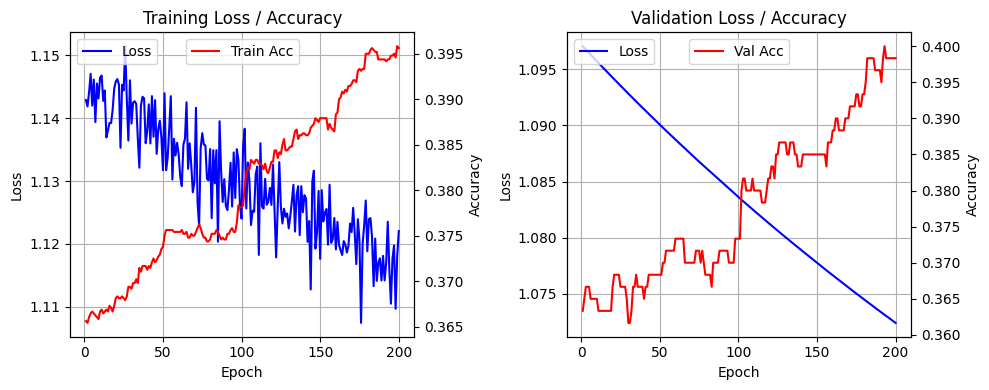

In [48]:
import matplotlib.pyplot as plt

# Replace history.history[...] with your own lists
# Make sure these lists exist and have one entry per epoch:
# train_loss_history, train_acc_history, val_loss_history, val_acc_history
epochs = range(1, len(train_loss_history) + 1)

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # adjust figsize as needed

# ------------------------
# 1. Training Loss & Accuracy
# ------------------------
axes[0].plot(epochs, train_loss_history, label='Loss', color='blue')
axes[0].set_title('Training Loss / Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='upper left')
axes[0].grid(True)

ax0_2 = axes[0].twinx()
ax0_2.plot(epochs, train_acc_history, color='red', label='Train Acc')
ax0_2.set_ylabel('Accuracy')
ax0_2.legend(loc='upper center')

# ------------------------
# 2. Validation Loss & Accuracy
# ------------------------
axes[1].plot(epochs, val_loss_history, label='Loss', color='blue')
axes[1].set_title('Validation Loss / Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')
axes[1].grid(True)

ax1_2 = axes[1].twinx()
ax1_2.plot(epochs, val_acc_history, color='red', label='Val Acc')
ax1_2.set_ylabel('Accuracy')
ax1_2.legend(loc='upper center')

plt.tight_layout()
plt.show()


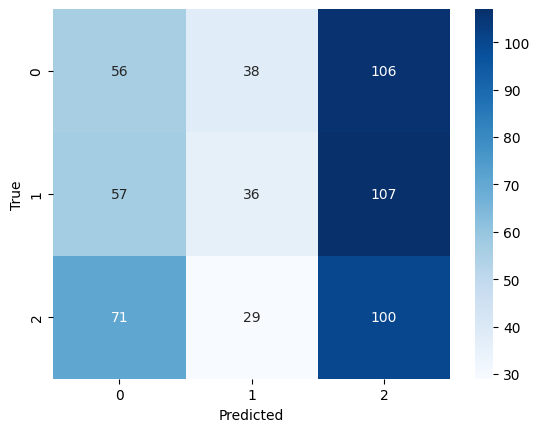

In [37]:
from sklearn.metrics import confusion_matrix

y_val_pred_labels = np.argmax(y_val_pred, axis=1)
cm = confusion_matrix(y_val, y_val_pred_labels)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



### Evaluate different parameters

Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.0, opt=adam, mom=0.0
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.0, opt=momentum, mom=0.9
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.0, opt=momentum, mom=0.99
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.0001, opt=adam, mom=0.0
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.0001, opt=momentum, mom=0.9
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.0001, opt=momentum, mom=0.99
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.01, opt=adam, mom=0.0
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.01, opt=momentum, mom=0.9
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0, l2=0.01, opt=momentum, mom=0.99
Training: act=sigmoid, hidden=[64, 64], lr=0.001, drop=0.0, l1=0.0001, l2=0.0, opt=adam, mom=0.0
Training: act=sigm

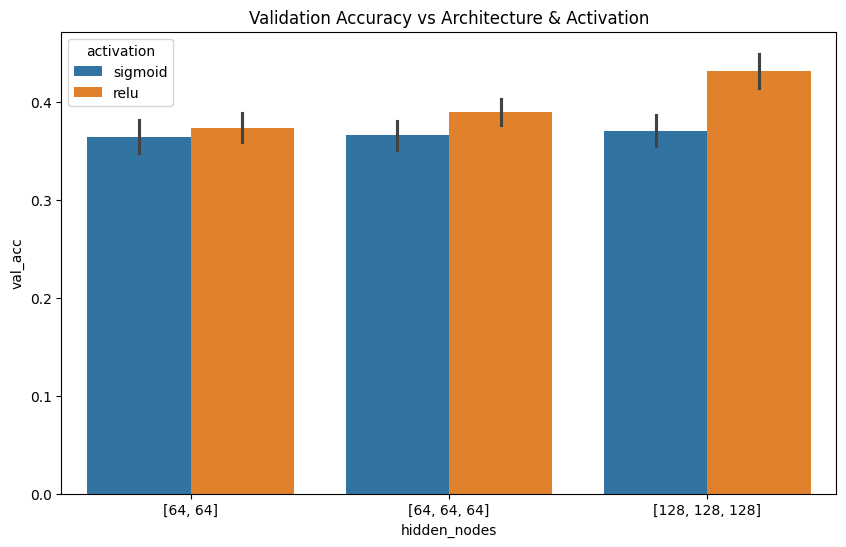

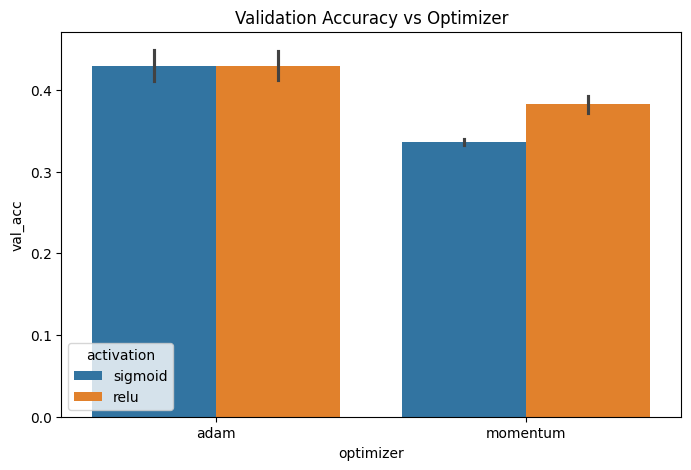

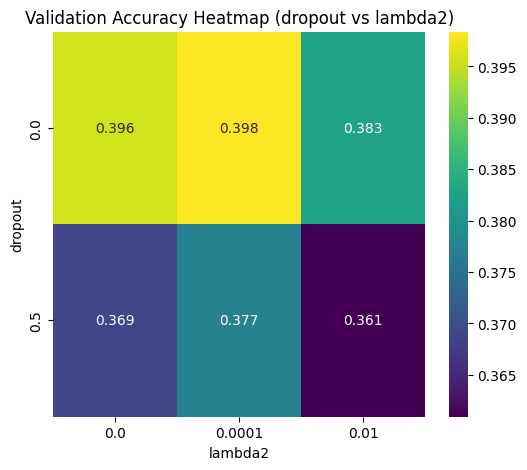

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your NeuralNetwork class is already defined and imported

# -------------------------------
# Define hyperparameter ranges
# -------------------------------
activations = ['sigmoid', 'relu']
hidden_nodes_list = [[64,64], [64,64,64], [128,128,128]]
learning_rates = [0.001, 0.0001]
dropouts = [0.0, 0.5]
lambda1_list = [0.0, 1e-4]
lambda2_list = [0.0,1e-4, 1e-2]
optimizers = ['adam', 'momentum']
momentum_values = [0.9, 0.99]

n_epochs = 100  # Adjust if needed

# -------------------------------
# Prepare results storage
# -------------------------------
results = []

# -------------------------------
# Loop over hyperparameter combinations
# -------------------------------
for activation in activations:
    for hidden_nodes in hidden_nodes_list:
        for lr in learning_rates:
            for dropout in dropouts:
                for lambda1 in lambda1_list:
                    for lambda2 in lambda2_list:
                        for optimizer in optimizers:
                            # Momentum is only used for momentum optimizer
                            momentum_opts = momentum_values if optimizer=='momentum' else [0.0]

                            for momentum in momentum_opts:
                                print(f"Training: act={activation}, hidden={hidden_nodes}, lr={lr}, drop={dropout}, l1={lambda1}, l2={lambda2}, opt={optimizer}, mom={momentum}")

                                # Initialize neural network
                                nn = NeuralNetwork(
                                    activation_function=activation,
                                    no_of_input_nodes=X_train.shape[1],
                                    no_of_hidden_nodes=hidden_nodes,
                                    no_of_output_nodes=3,
                                    n_epochs=n_epochs,
                                    lr=lr,
                                    lambda1=lambda1,
                                    lambda2=lambda2,
                                    dropout=dropout,
                                    optimizer=optimizer,
                                    momentum=momentum
                                )

                                # Train the network
                                for epoch in range(n_epochs):
                                    # Forward pass
                                    y_pred_train = nn.forward_pass(X_train, training=True)
                                    # Compute loss
                                    loss = nn.compute_loss(y_pred_train, y_train)
                                    # Backward pass
                                    nn.backward_pass(X_train, y_train)

                                # Evaluate training accuracy
                                y_train_pred = nn.forward_pass(X_train, training=False)
                                y_train_labels = np.argmax(y_train_pred, axis=1)
                                train_acc = np.mean(y_train_labels == y_train)

                                # Evaluate validation accuracy
                                y_val_pred = nn.forward_pass(X_val, training=False)
                                y_val_labels = np.argmax(y_val_pred, axis=1)
                                val_acc = np.mean(y_val_labels == y_val)

                                # Save results
                                results.append({
                                    'activation': activation,
                                    'hidden_nodes': str(hidden_nodes),
                                    'lr': lr,
                                    'dropout': dropout,
                                    'lambda1': lambda1,
                                    'lambda2': lambda2,
                                    'optimizer': optimizer,
                                    'momentum': momentum,
                                    'train_acc': train_acc,
                                    'val_acc': val_acc,
                                    'final_loss': loss
                                })

# -------------------------------
# Convert results to DataFrame
# -------------------------------
df_results = pd.DataFrame(results)
df_results.to_csv("latest_finetuned_results.csv", index=False)
print("Saved results to csv file")

# -------------------------------
# Plotting examples
# -------------------------------

# 1. Validation accuracy vs architecture
plt.figure(figsize=(10,6))
sns.barplot(x='hidden_nodes', y='val_acc', hue='activation', data=df_results)
plt.title("Validation Accuracy vs Architecture & Activation")
plt.show()

# 2. Validation accuracy vs optimizer
plt.figure(figsize=(8,5))
sns.barplot(x='optimizer', y='val_acc', hue='activation', data=df_results)
plt.title("Validation Accuracy vs Optimizer")
plt.show()

# 3. Heatmap for dropout and lambda2
subset = df_results[df_results['lambda1']==0.0]
pivot_table = subset.pivot_table(values='val_acc', index='dropout', columns='lambda2')
plt.figure(figsize=(6,5))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis')
plt.title("Validation Accuracy Heatmap (dropout vs lambda2)")
plt.show()


In [80]:
df_results = pd.read_csv('latest_finetuned_results.csv')
df_results

,activation,hidden_nodes,lr,dropout,lambda1,lambda2,optimizer,momentum,train_acc,val_acc,final_loss
0,sigmoid,"[64, 64]",0.0010,0.0,0.0000,0.0000,adam,0.00,0.533125,0.530000,0.948506
1,sigmoid,"[64, 64]",0.0010,0.0,0.0000,0.0000,momentum,0.90,0.342917,0.310000,1.485543
2,sigmoid,"[64, 64]",0.0010,0.0,0.0000,0.0000,momentum,0.99,0.296250,0.326667,2.714648
3,sigmoid,"[64, 64]",0.0010,0.0,0.0000,0.0001,adam,0.00,0.526458,0.535000,1.113837
4,sigmoid,"[64, 64]",0.0010,0.0,0.0000,0.0001,momentum,0.90,0.340625,0.330000,2.816763
...,...,...,...,...,...,...,...,...,...,...,...
427,relu,"[128, 128, 128]",0.0001,0.5,0.0001,0.0001,momentum,0.90,0.390417,0.376667,25.006042
428,relu,"[128, 128, 128]",0.0001,0.5,0.0001,0.0001,momentum,0.99,0.350000,0.378333,24.984658
429,relu,"[128, 128, 128]",0.0001,0.5,0.0001,0.0100,adam,0.00,0.400208,0.365000,138.850945
430,relu,"[128, 128, 128]",0.0001,0.5,0.0001,0.0100,momentum,0.90,0.407917,0.406667,138.186030


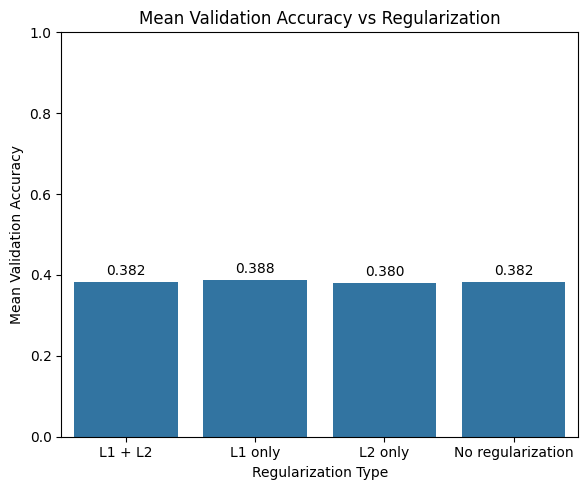

In [85]:
def reg_category(row):
    if row['lambda1'] > 0 and row['lambda2'] > 0:
        return 'L1 + L2'
    elif row['lambda1'] > 0 and row['lambda2'] == 0:
        return 'L1 only'
    elif row['lambda1'] == 0 and row['lambda2'] > 0:
        return 'L2 only'
    else:
        return 'No regularization'

df_results['reg_category'] = df_results.apply(reg_category, axis=1)

reg_summary = (
    df_results
    .groupby('reg_category')['val_acc']
    .mean()
    .reset_index()
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.barplot(
    x='reg_category',
    y='val_acc',
    data=reg_summary
)

for i, row in reg_summary.iterrows():
    plt.text(
        i,
        row['val_acc'] + 0.01,
        f"{row['val_acc']:.3f}",
        ha='center',
        va='bottom',
        fontsize=10
    )


plt.ylabel("Mean Validation Accuracy")
plt.xlabel("Regularization Type")
plt.title("Mean Validation Accuracy vs Regularization")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### Best Params

Find accuracies of the model with the best params and make some plots

In [86]:
# Find the index of the row with the highest validation accuracy
best_idx = df_results['val_acc'].idxmax()
best_row = df_results.iloc[best_idx]
best_row


activation                  relu
hidden_nodes     [128, 128, 128]
lr                         0.001
dropout                      0.0
lambda1                   0.0001
lambda2                     0.01
optimizer                   adam
momentum                     0.0
train_acc               0.635625
val_acc                     0.59
final_loss            111.084893
L2_group                  L2 > 0
dropout_group         No Dropout
reg_category             L1 + L2
Name: 375, dtype: object

Let's run the experiment with the best params

In [87]:
nn = NeuralNetwork(
    activation_function='relu',
    no_of_input_nodes=X_train.shape[1], # input features
    no_of_hidden_nodes=[128, 128, 128],
    no_of_output_nodes=len(np.unique(y_train)),
    n_epochs=200,
    lambda1=0.0001,
    lambda2=0.01,
    lr=0.001,
    dropout=0.0,
    optimizer="adam",
    momentum=0.0
    )

# save loss and accuracies for plotting
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(nn.n_epochs):
    # Forward pass
    y_pred = nn.forward_pass(X_train, training=True)

    # Loss function
    loss_train = nn.compute_loss(y_pred, y_train)
    train_loss_history.append(loss_train)

    # Backward pass
    nn.backward_pass(X_train, y_train)

    # Compute training accuracy (evaluation mode)
    y_pred_train_eval = nn.forward_pass(X_train, training=False)
    train_labels = np.argmax(y_pred_train_eval, axis=1)
    train_acc = np.mean(train_labels == y_train)
    train_acc_history.append(train_acc)
    
    # Compute validation loss and accuracy
    y_val_pred = nn.forward_pass(X_val, training=False)
    loss_val = nn.compute_loss(y_val_pred, y_val)
    val_loss_history.append(loss_val)
    
    val_labels = np.argmax(y_val_pred, axis=1)
    val_acc = np.mean(val_labels == y_val)
    val_acc_history.append(val_acc)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss_train:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {loss_val:.4f}, Val Acc: {val_acc:.4f}")




Epoch 0, Train Loss: 138.5263, Train Acc: 0.3248, Val Loss: 138.4189, Val Acc: 0.3250
Epoch 10, Train Loss: 135.1400, Train Acc: 0.3800, Val Loss: 135.5576, Val Acc: 0.3750
Epoch 20, Train Loss: 131.9716, Train Acc: 0.4383, Val Loss: 132.5927, Val Acc: 0.4217
Epoch 30, Train Loss: 130.3392, Train Acc: 0.4544, Val Loss: 130.5631, Val Acc: 0.4483
Epoch 40, Train Loss: 127.3188, Train Acc: 0.5090, Val Loss: 127.4781, Val Acc: 0.5117
Epoch 50, Train Loss: 125.8164, Train Acc: 0.5133, Val Loss: 126.2341, Val Acc: 0.5067
Epoch 60, Train Loss: 124.0364, Train Acc: 0.5235, Val Loss: 124.7781, Val Acc: 0.5217
Epoch 70, Train Loss: 122.5821, Train Acc: 0.5450, Val Loss: 123.6436, Val Acc: 0.5367
Epoch 80, Train Loss: 121.1687, Train Acc: 0.5531, Val Loss: 122.5254, Val Acc: 0.5367
Epoch 90, Train Loss: 119.7806, Train Acc: 0.5744, Val Loss: 121.3807, Val Acc: 0.5500
Epoch 100, Train Loss: 118.4659, Train Acc: 0.5790, Val Loss: 120.2493, Val Acc: 0.5517
Epoch 110, Train Loss: 117.1975, Train Acc:

In [88]:
y_pred = nn.forward_pass(X_train, training=False)
y_pred_labels = np.argmax(y_pred, axis=1)

train_accuracy = np.mean(y_pred_labels == y_train)
print("Training accuracy:", train_accuracy)

# Validation
y_val_pred = nn.forward_pass(X_val, training=False)
y_val_labels = np.argmax(y_val_pred, axis=1)

val_accuracy = np.mean(y_val_labels == y_val)
print("Validation accuracy:", val_accuracy)

# Testing / Evaluation
y_test_pred = nn.forward_pass(X_test, training=False)  # no dropout
y_test_labels = np.argmax(y_test_pred, axis=1)
test_accuracy = np.mean(y_test_labels == y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

Training accuracy: 0.6595833333333333
Validation accuracy: 0.56
Test Accuracy: 0.5867


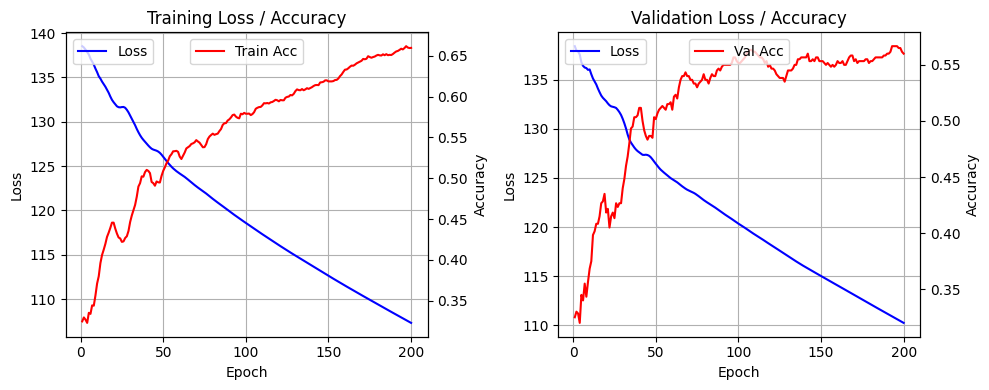

In [89]:
import matplotlib.pyplot as plt

# Replace history.history[...] with your own lists
# Make sure these lists exist and have one entry per epoch:
# train_loss_history, train_acc_history, val_loss_history, val_acc_history
epochs = range(1, len(train_loss_history) + 1)

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # adjust figsize as needed

# ------------------------
# 1. Training Loss & Accuracy
# ------------------------
axes[0].plot(epochs, train_loss_history, label='Loss', color='blue')
axes[0].set_title('Training Loss / Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='upper left')
axes[0].grid(True)

ax0_2 = axes[0].twinx()
ax0_2.plot(epochs, train_acc_history, color='red', label='Train Acc')
ax0_2.set_ylabel('Accuracy')
ax0_2.legend(loc='upper center')

# ------------------------
# 2. Validation Loss & Accuracy
# ------------------------
axes[1].plot(epochs, val_loss_history, label='Loss', color='blue')
axes[1].set_title('Validation Loss / Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')
axes[1].grid(True)

ax1_2 = axes[1].twinx()
ax1_2.plot(epochs, val_acc_history, color='red', label='Val Acc')
ax1_2.set_ylabel('Accuracy')
ax1_2.legend(loc='upper center')

plt.tight_layout()
plt.show()
